In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
file_path = r"C:\Users\user\Downloads/homicide_by_countries.csv"
homicide_df = pd.read_csv(file_path)



In [8]:
# Display first few rows
display(homicide_df.head())

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [9]:
# Basic Statistics
summary_stats = homicide_df.describe()
display(summary_stats)

,Rate,Count,Year
count,195.000000,195.000000,195.000000
mean,6.845128,1942.800000,2017.420513
std,9.600060,6553.343376,3.589445
min,0.000000,0.000000,2006.000000
25%,1.100000,28.000000,2016.000000
50%,2.600000,128.000000,2019.000000
75%,7.850000,785.000000,2020.000000
max,49.300000,47722.000000,2021.000000


In [10]:
# Top 10 countries with highest homicide rates
top_countries = homicide_df.nlargest(10, 'Rate')[['Location', 'Rate', 'Count', 'Year']]
display(top_countries)

,Location,Rate,Count,Year
187,U.S. Virgin Islands,49.3,52,2012
87,Jamaica,44.7,1323,2020
98,Lesotho,43.6,897,2015
176,Trinidad and Tobago,38.6,538,2019
53,El Salvador,37.2,2398,2019
190,Venezuela,36.7,10598,2018
74,Honduras,36.3,3598,2020
162,South Africa,33.5,19846,2020
111,Mexico,28.4,36579,2020
118,Myanmar,28.4,15299,2021


In [11]:
# Bottom 10 countries with lowest homicide rates (excluding zero rates)
bottom_countries = homicide_df[homicide_df['Rate'] > 0].nsmallest(10, 'Rate')[['Location', 'Rate', 'Count', 'Year']]
display(bottom_countries)

,Location,Rate,Count,Year
14,Bahrain,0.1,2,2019
102,Luxembourg,0.2,1,2020
159,Singapore,0.2,10,2020
75,Hong Kong,0.3,22,2020
88,Japan,0.3,318,2020
103,Macau,0.3,2,2020
128,Oman,0.3,14,2020
155,Senegal,0.3,39,2015
79,Indonesia,0.4,1150,2018
137,Qatar,0.4,12,2020


In [12]:
# Homicide rate by region
region_stats = homicide_df.groupby('Region')['Rate'].mean().sort_values(ascending=False)
display(region_stats)

Region
Americas    16.031373
Africa       7.395000
Asia         2.790196
Oceania      1.750000
Europe       1.482353
Name: Rate, dtype: float64

In [13]:
# Homicide trends over time
yearly_trends = homicide_df.groupby('Year')['Rate'].mean()
display(yearly_trends)

Year
2006     6.250000
2007    19.000000
2008     5.100000
2009     6.583333
2010     6.066667
2011     2.020000
2012    10.863636
2013     4.340000
2014    10.840000
2015     6.500000
2016     8.755556
2017     3.030000
2018     5.384615
2019     8.050000
2020     6.468085
2021    28.400000
Name: Rate, dtype: float64

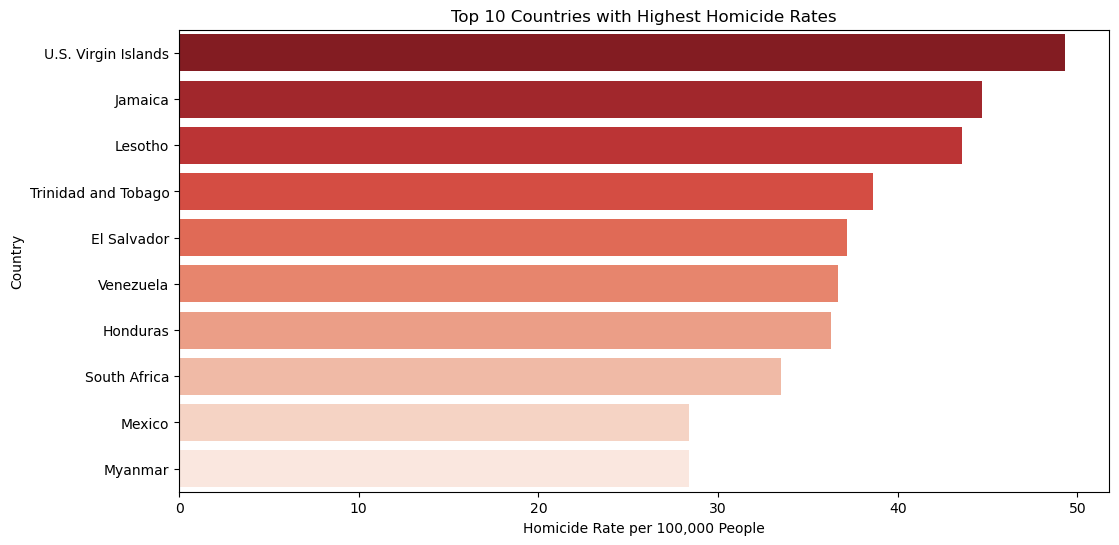

In [14]:
# Visualization: Top 10 Countries with Highest Homicide Rates
plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x='Rate', y='Location', palette='Reds_r')
plt.title("Top 10 Countries with Highest Homicide Rates")
plt.xlabel("Homicide Rate per 100,000 People")
plt.ylabel("Country")
plt.show()

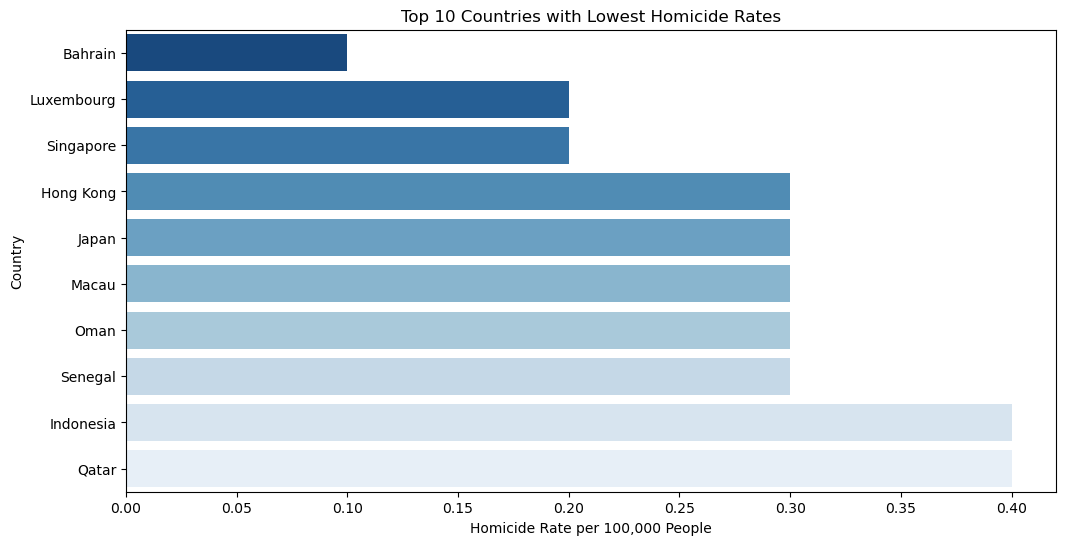

In [15]:
# Visualization: Bottom 10 Countries with Lowest Homicide Rates
plt.figure(figsize=(12,6))
sns.barplot(data=bottom_countries, x='Rate', y='Location', palette='Blues_r')
plt.title("Top 10 Countries with Lowest Homicide Rates")
plt.xlabel("Homicide Rate per 100,000 People")
plt.ylabel("Country")
plt.show()

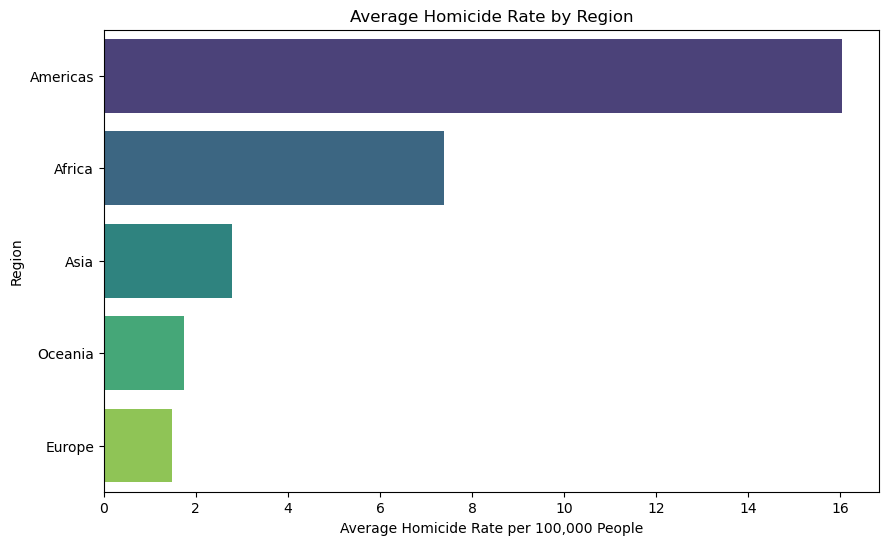

In [16]:
# Visualization: Homicide Rate by Region
plt.figure(figsize=(10,6))
sns.barplot(x=region_stats.values, y=region_stats.index, palette='viridis')
plt.title("Average Homicide Rate by Region")
plt.xlabel("Average Homicide Rate per 100,000 People")
plt.ylabel("Region")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


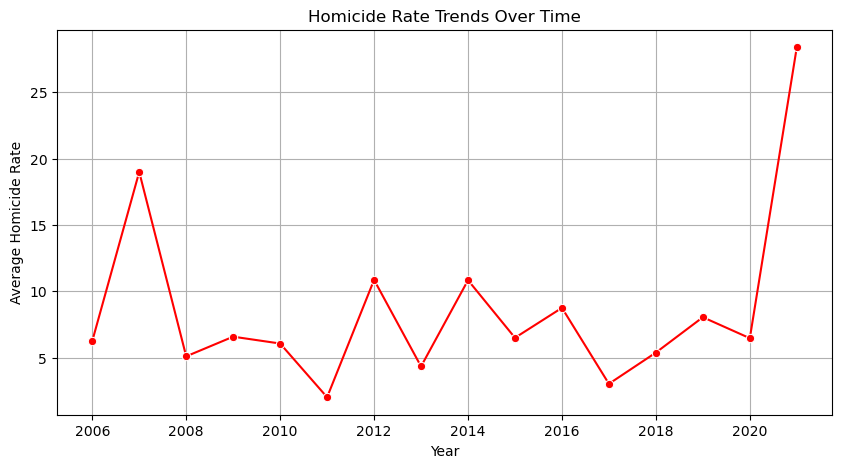

In [17]:
# Visualization: Homicide Trends Over Time
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker="o", linestyle="-", color="red")
plt.title("Homicide Rate Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Average Homicide Rate")
plt.grid(True)
plt.show()